PROBLEM STATEMENT: Use decision trees to prepare a model on fraud data .Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [85]:
df=pd.read_csv('Fraud_check.csv')

In [86]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [87]:
df.head()
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad']) 
df['Urban']=label_encoder.fit_transform(df['Urban'])
df['Marital.Status']=label_encoder.fit_transform(df['Marital.Status'])

In [88]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [89]:
df.insert(6,'new'," ")

for i in range(0,len(df['Taxable.Income']),1):
    if df['Taxable.Income'].iloc[i] <= 30000:
        df['new'].iloc[i]='Risky'
    else:
        df['new'].iloc[i]='Good'

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [90]:
df.drop(columns=['Taxable.Income'],inplace=True)

In [91]:
df['new']= label_encoder.fit_transform(df['new'])

In [92]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,new
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [93]:
x=df[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]
y=df['new']

In [94]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [95]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: new, dtype: int32

In [96]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Using gini index to check results

In [97]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [98]:
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [99]:
y_pred_gini=clf_gini.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_gini)

0.7583333333333333

In [101]:
y_pred_train_gini=clf_gini.predict(x_train)
accuracy_score(y_train,y_pred_train_gini)

0.80625

The training set accuracy score is 0.80 while the test-set score accuracy is 0.75.There is no much differnece so we can say that there is no overfitting

# Visualize decision tree

[Text(362.70000000000005, 380.52, 'X[2] <= 63983.0\ngini = 0.32\nsamples = 480\nvalue = [384, 96]'),
 Text(223.20000000000002, 271.8, 'X[2] <= 40128.5\ngini = 0.215\nsamples = 106\nvalue = [93, 13]'),
 Text(111.60000000000001, 163.07999999999998, 'X[2] <= 39660.0\ngini = 0.331\nsamples = 43\nvalue = [34, 9]'),
 Text(55.800000000000004, 54.360000000000014, 'gini = 0.308\nsamples = 42\nvalue = [34, 8]'),
 Text(167.4, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(334.8, 163.07999999999998, 'X[4] <= 0.5\ngini = 0.119\nsamples = 63\nvalue = [59, 4]'),
 Text(279.0, 54.360000000000014, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(390.6, 54.360000000000014, 'gini = 0.202\nsamples = 35\nvalue = [31, 4]'),
 Text(502.20000000000005, 271.8, 'X[2] <= 64532.5\ngini = 0.345\nsamples = 374\nvalue = [291, 83]'),
 Text(446.40000000000003, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(558.0, 163.07999999999998, 'X[2] <= 130296.0\ngini = 0.341\nsample

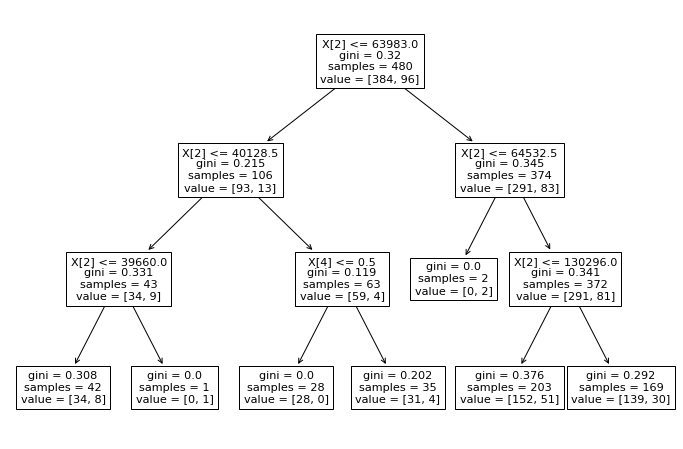

In [102]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train,y_train))

# Using Grid Search to optimize hyperparameters of decision tree

In [103]:
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [104]:
std_slc=StandardScaler()

Principal Component Analysis(PCA) which will reduce the dimension of features by creating new features which have most of the varience of the original data

In [105]:
pca = decomposition.PCA()

we are using Decision Tree Classifier as a Machine Learning model to use GridSearchCV. So we have created an object dec_tree.

In [106]:
dec_tree = tree.DecisionTreeClassifier()

Pipeline will helps us by passing modules one by one through GridSearchCV for which we want to get the best parameters. So we are making an object pipe to create a pipeline for all the three objects std_scl, pca and dec_tree.

In [107]:
pipe = Pipeline(steps=[('std_slc', std_slc),('pca', pca),('dec_tree', dec_tree)])

StandardScaler doesnot requires any parameters to be optimised by GridSearchCV. Principal Component Analysis requires a parameter 'n_components' to be optimised by GridSearchCV. DecisionTreeClassifier requires two parameters 'criterion' and 'max_depth' to be optimised by GridSearchCV

In [108]:
n_components = list(range(1,x.shape[1]+1,1))

In [109]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

Created a dictionary to set all the parameters options for different objects/modules.

In [110]:
parameters = dict(pca__n_components=n_components,dec_tree__criterion=criterion,dec_tree__max_depth=max_depth)

In [111]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x, y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5]})

In [112]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 2
Best Number Of Components: 2

DecisionTreeClassifier(criterion='entropy', max_depth=2)


# Classification report and confusion matrix

In [116]:
from sklearn.metrics import confusion_matrix
clf_en=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)
clf_en.fit(x_train,y_train)
y_pred_en=clf_en.predict(x_test)
cm=confusion_matrix(y_test,y_pred_en)
cm

array([[90,  2],
       [27,  1]], dtype=int64)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_en))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86        92
           1       0.33      0.04      0.06        28

    accuracy                           0.76       120
   macro avg       0.55      0.51      0.46       120
weighted avg       0.67      0.76      0.68       120



In [118]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

training accuracy : 0.8
testing accuracy : 0.7666666666666667
